In [21]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from sklearn.model_selection import train_test_split
from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.imputation import MeanMedianImputer,AddMissingIndicator
from feature_engine.imputation import CategoricalImputer
from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)
from sklearn.preprocessing import FunctionTransformer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [22]:
dataa = pd.read_csv('../houseprice.csv')

print(dataa.shape)

dataa.head()

<IPython.core.display.Javascript object>

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataa.drop(
    ['Id', 'SalePrice'], axis=1),
    dataa['SalePrice'],
    test_size=0.2,
    random_state=0)

<IPython.core.display.Javascript object>

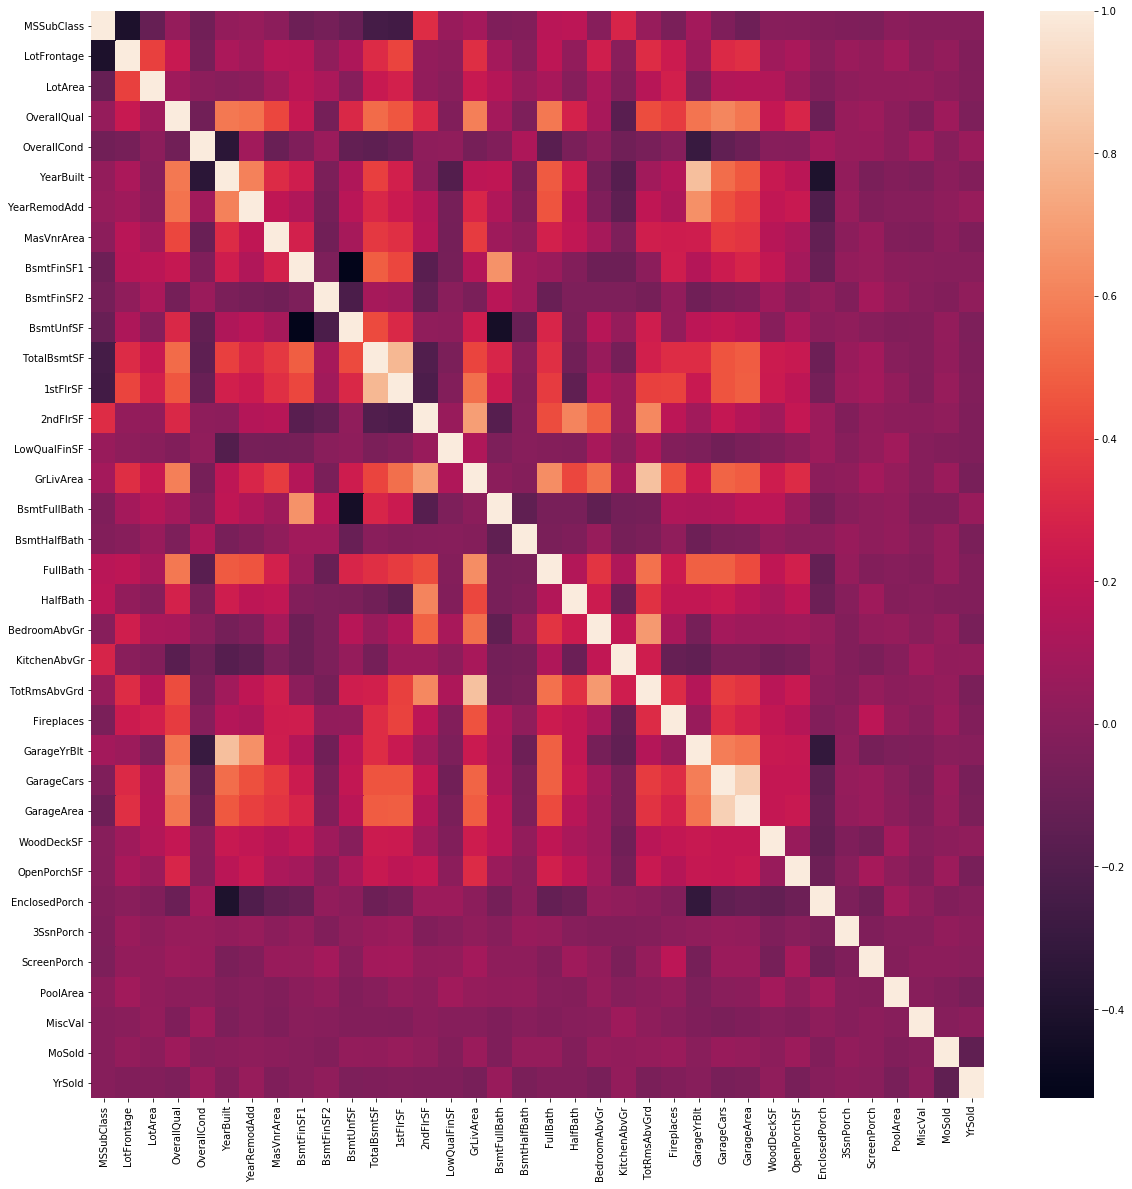

In [24]:
plt.figure(figsize=(20,20))
corr = X_train.corr()
sns.heatmap(corr)

In [25]:
def correlation(dataset, threshold):
    corrs    = []
    for row in dataset.index:
        for column in dataset.columns:
            if row == column: 
                break
            if dataset.at[row,column] > threshold and dataset.at[row,column] < 1:
                tup = row,column,dataset.at[row,column]
                corrs.append(tup)
                 
    return corrs       

In [26]:
arr =correlation(corr, 0.8)
pd.DataFrame(arr,columns=['feat1','feat2','corr'])

<IPython.core.display.Javascript object>

,feat1,feat2,corr
0,TotRmsAbvGrd,GrLivArea,0.829416
1,GarageYrBlt,YearBuilt,0.822975
2,GarageArea,GarageCars,0.887174


In [27]:

categories = list(X_train.select_dtypes(include =['object','bool']).columns)
numbers  = list(X_train.select_dtypes(include=['int64','float64']).columns)
year_features =[i for i in numbers if all(np.isin(X_train[i].dropna().unique(),np.arange(1500,2099)))]
discrete = [i for i in numbers if X_train[i].nunique() <20 and i not in year_features]
continous = [i for i in numbers if i not in(discrete) and i not in year_features]

catFewNulls = [i for i in categories if X_train[i].isnull().mean()> 0 and X_train[i].isnull().mean() <0.05]
catLargeNulls = [i for i in categories if X_train[i].isnull().mean()>= 0.05]
NumFewNulls = [i for i in numbers if X_train[i].isnull().mean()> 0 and X_train[i].isnull().mean() <0.05]
NumLargeNulls = [i for i in numbers if X_train[i].isnull().mean()>= 0.05]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
def discrete_to_category(X):
    numbers  = list(X.select_dtypes(include=['int64','float64']).columns)
    year_features =[i for i in numbers if all(np.isin(X[i].dropna().unique(),np.arange(1500,2099)))]
    discrete = [i for i in numbers if X[i].nunique() <20 and i not in year_features]
    X[discrete] =  X[discrete].astype('O')
    return X

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
pipe_preprocess = Pipeline([
                 ('drop_constant_features', DropConstantFeatures(tol=0.995, missing_values='include')),
                 ('drop_duplicate_feature',DropDuplicateFeatures()),
                 ('correlation', SmartCorrelatedSelection(selection_method='variance')),
                 ('drop_high_missing_categories',DropFeatures(['Alley','MiscFeature'])),
                 ('create_number_of_years',CombineWithReferenceFeature(variables_to_combine=['YrSold'],
                                   reference_variables=['YearBuilt', 'YearRemodAdd'],
                                   operations= ['sub'])),
                 ('drop_years',DropFeatures(['YearBuilt', 'YearRemodAdd','YrSold'])),
                 ('missing_indicator',AddMissingIndicator(variables=['LotFrontage'])),
                 ('mean_median_imputation',MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea'])),                 
                 ('category_missing_imputation',CategoricalImputer(imputation_method = 'missing',variables=['FireplaceQu','GarageType',
                                                                        'GarageFinish','GarageQual','GarageCond','Fence'],return_object=True)),
                 ('category_frequent_imputation',CategoricalImputer(imputation_method = 'frequent',variables=['MasVnrType',
                         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical'],return_object=True)),
                 ('discrete_to_category',FunctionTransformer(discrete_to_category)),
                 ('rare_label_encoding',RareLabelEncoder(tol= 0.05,n_categories=1)),
                 ('discretisation',EqualFrequencyDiscretiser(6, return_object=True)),
                 ('target_encoding',OrdinalEncoder())
                ])
Xtrain = pipe_preprocess.fit_transform(X_train,y_train)
Xtest = pipe_preprocess.transform(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
pipe2 = Pipeline([('scaler',StandardScaler()),
                  ('modeling',AdaBoostRegressor())])
param_grid = {'modeling':[Ridge(),Lasso(),AdaBoostRegressor()], 'scaler':[MinMaxScaler(),StandardScaler()]}
grid = GridSearchCV(pipe2,param_grid,cv=5)
train = grid.fit(Xtrain,y_train)
print(train.score(Xtrain,y_train))
print(grid.best_params_)
print(grid.score(Xtest,y_test))

0.8711503145497099
{'modeling': AdaBoostRegressor(), 'scaler': StandardScaler()}
0.7624646020518367


In [32]:
train_predicts = grid.predict(Xtrain)
print('train rmse: {}'.format(np.sqrt(mean_squared_error(y_train, train_predicts))))
test_predicts = grid.predict(Xtest)
print('test rmse: {}'.format(np.sqrt(mean_squared_error(y_test, test_predicts))))

<IPython.core.display.Javascript object>

train rmse: 28165.97918615142


<IPython.core.display.Javascript object>

test rmse: 40501.652057291394


In [33]:
pipe_preprocess.named_steps['drop_constant_features'].features_to_drop_

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [34]:
pipe_preprocess.named_steps['correlation'].features_to_drop_

['TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars']

In [35]:
#coef = grid.best_estimator_.named_steps['modeling'].coef_
coef = grid.best_estimator_.named_steps['modeling'].feature_importances_

In [36]:
important_features = pd.Series(abs(coef),index=Xtrain.columns).sort_values(ascending=False)

<IPython.core.display.Javascript object>

In [37]:
important_features.head(10)

OverallQual     0.143754
GrLivArea       0.107596
BsmtQual        0.088297
BsmtExposure    0.058303
RoofMatl        0.055977
Neighborhood    0.049744
GarageArea      0.049185
BsmtHalfBath    0.047923
BedroomAbvGr    0.046092
TotalBsmtSF     0.038692
dtype: float64

<IPython.core.display.Javascript object>

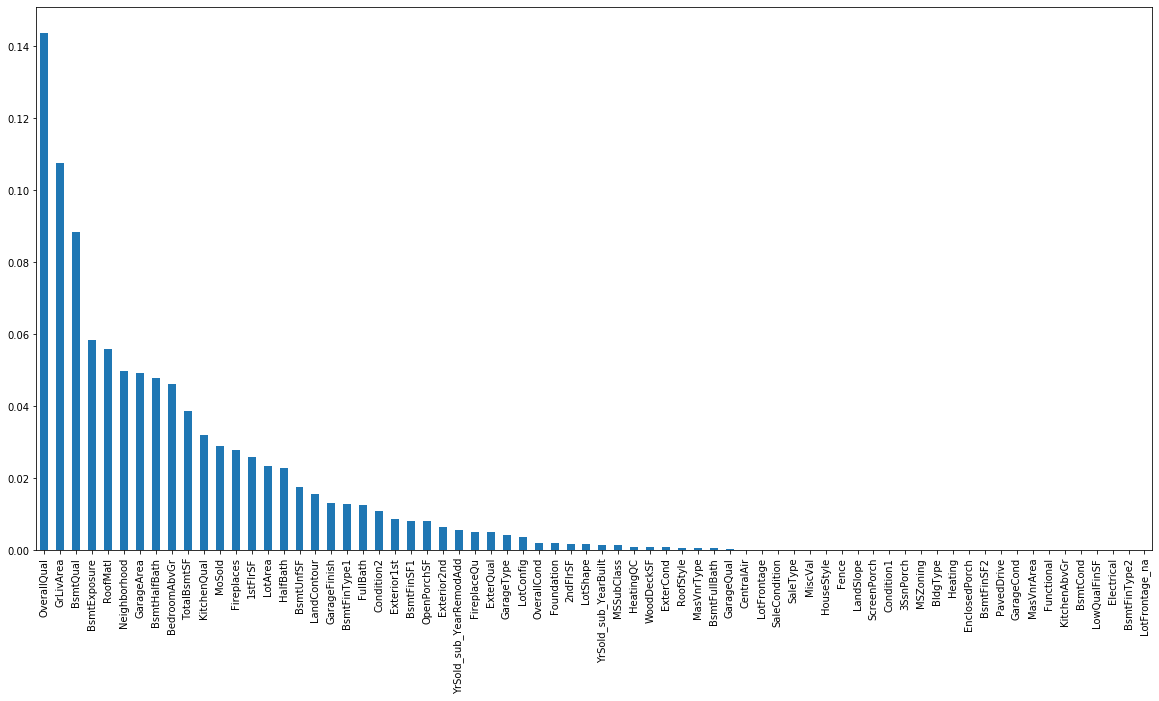

In [38]:
plt.figure(figsize=(20,10))
important_features.plot.bar()

In [39]:
predicts = grid.predict(Xtest)

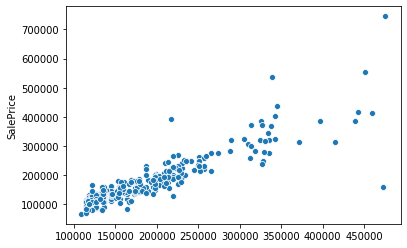

In [40]:
sns.scatterplot(predicts,y_test)